In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.autograd.profiler as profiler
from scipy.constants import *
import time

from simulator import *
from utils import *
from physics import *

device = "cuda" if torch.cuda.is_available() else "cpu"
set_seed(2304)

In [2]:
# Parametri
Lx, Ly = 1.0, 1.0
Nx, Ny = 64, 64
simulation_time = 3e-7
dt = 1e-9
normalization = 1.0
backend = "cpu"
simulation_name = "Test_2"

sim = Space(
    simulation_name= simulation_name,
    Lx=Lx,
    Ly=Ly,
    Nx=Nx,
    Ny=Ny,
    simulation_time=simulation_time,
    dt=dt,
    normalization=normalization,
    boundaries_type="reflecting",
    save_frequency=2,
    backend= backend
)

sim.poisson_method = "gauss_seidel"

# Crea ioni (carica positiva)
num_ioni = 10000
sim.create_new_specie(
    name="ioni",
    num_particles=num_ioni,
    temperature=0.0,
    distribution="zero",  # velocità iniziale nulla
    mass=1836.0,          # ad es. rapportiamo la massa a quella dell'elettrone
    charge=1.0,
    disposition="random"
)

# Crea elettroni (carica negativa)
num_elettroni = 10000
sim.create_new_specie(
    name="elettroni",
    num_particles=num_elettroni,
    temperature=0.0,
    distribution="zero",
    mass=1.0,
    charge=-1.0,
    disposition="random"
)

# Aggiungiamo una piccola perturbazione di velocità agli elettroni
# Ad esempio, una perturbazione sinusoidale in direzione x
vx_perturb = 0.01  # ampiezza della perturbazione
positions = sim.particles_position
# Selezioniamo soltanto gli elettroni
is_electron = (sim.particles_specie == sim.name_register.tolist().index("elettroni"))
sim.particles_velocity[is_electron, 0] += vx_perturb * torch.sin(
    2.0 * np.pi * positions[is_electron, 0] / Lx
)

# Simulazione
sim.simulate()

# Analisi finale: si può guardare la storia dell’energia
print("Energia cinetica:", sim.kinetic_energy_chronology)
print("Energia potenziale:", sim.potential_energy_chronology)
print("Energia totale:", sim.mechanic_energy_chronology)

100%|██████████| 299/299 [00:06<00:00, 46.22 step/s]

Energia cinetica: []
Energia potenziale: []
Energia totale: []


In [3]:
simulation = load_simulation(simulation_name, device= backend)

[INFO] Caricati i dataset dal file Test_2: ['charge_register', 'fields_chronology', 'fixed_potential_mask', 'fixed_potential_value', 'grid_chronology', 'kinetic_energy_chronology', 'mass_register', 'mechanic_energy_chronology', 'name_register', 'particles_active_chronology', 'particles_position_chronology', 'particles_specie_chronology', 'particles_velocity_chronology', 'potential_energy_chronology', 'solid_mask', 'solid_type']


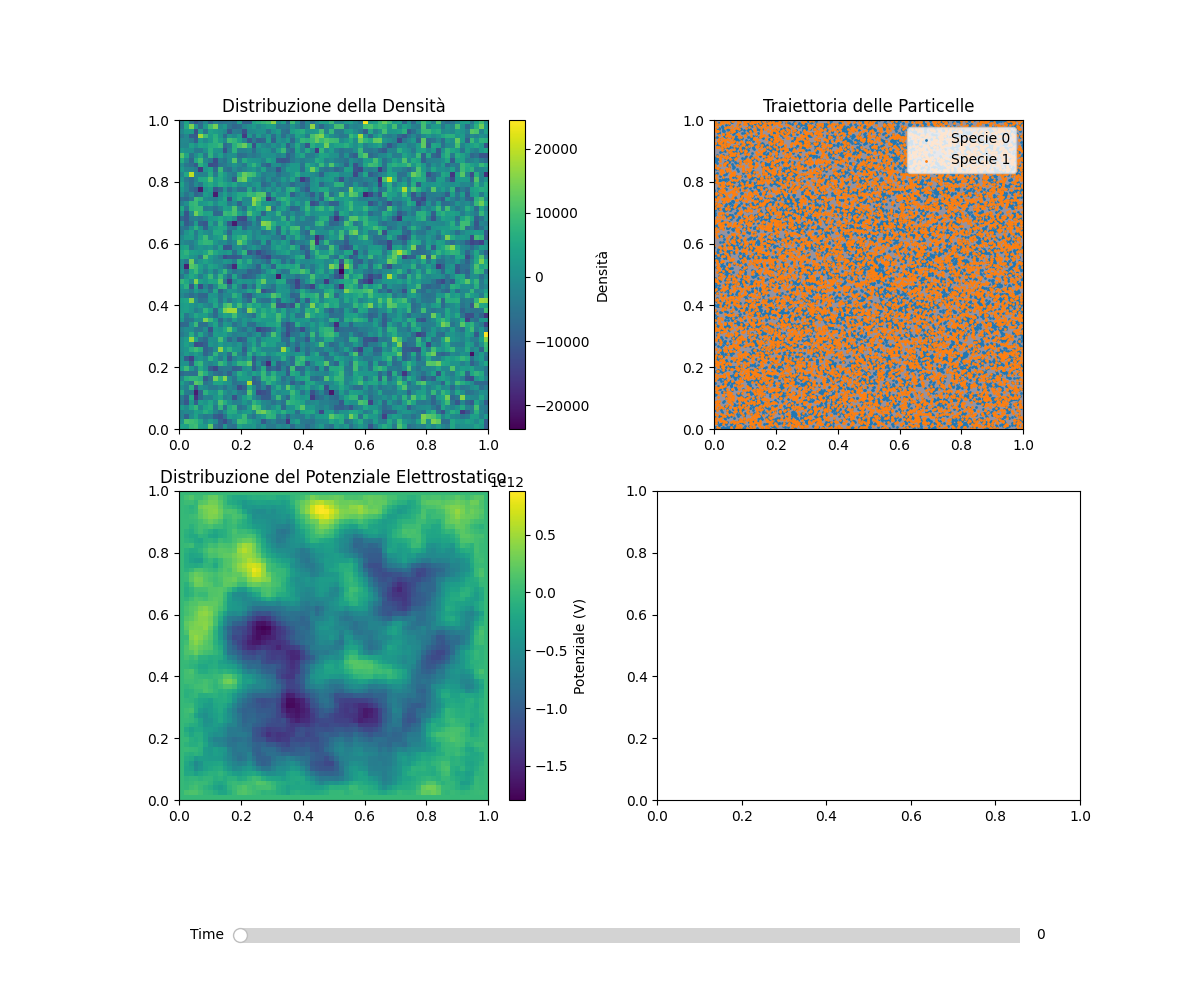

In [5]:
%matplotlib widget




dynamic_slider(simulation, Lx, Ly)

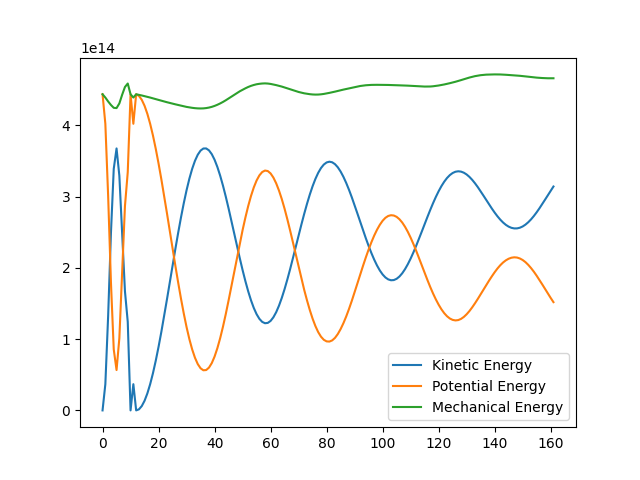

In [26]:
plt.close()
plt.figure()
plt.plot(kinetic_energy_chronology, label="Kinetic Energy")
plt.plot(potential_energy_chronology, label="Potential Energy")
plt.plot(mechanic_energy_chronology, label="Mechanical Energy")
plt.legend()
plt.show()